In [52]:
import numpy as np 
import pandas as pd 

In [53]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [54]:
df.shape

(271116, 15)

We don't want data of winter olympics. So we filter it out

In [55]:
df = df[df['Season'] == 'Summer']
df.shape

(222552, 15)

TASK 1 - MEDAL TALLY COUNTRY WISE 

1. In athelete file we have NOC and in noc_reigons file, we have corresponding regions mapped with NOC. regions is basically country. 
2. So we will create a merge of them. -> learn merge - can be asked in interview 
3. 

In [56]:
df=  df.merge(region_df,on='NOC', how='left')

In [57]:
df['region'].unique().shape

(206,)

Total 206 countries participated far now 

In [58]:
df.isnull().sum()
# this will give null values ka sum 

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(1385)

In [60]:
df.drop_duplicates(inplace=True)
# df.duplicated().sum()

In [61]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

Medals are writeen in Gold, Silver, Bronze and NaN values. We need to one-hot encode medals =

In [62]:
pd.get_dummies(df['Medal'])
#pandas.get_dummies() is used for data manipulation. 
# It converts categorical data into dummy or indicator variables.

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
222547,False,False,False
222548,False,False,False
222549,False,False,False
222550,False,False,False


In [63]:
# now we need to contact main df and df[medal].dummies 
df = pd.concat([df,pd.get_dummies(df['Medal'])], axis=1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,False,False,False
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,False,False,False
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False


In [64]:
# Grouping by NOC 
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
WIF,0,0,5
YEM,0,0,0
YAR,0,0,0


We have to remove duplicate rows based on year season city team event medal

In [65]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

In [66]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [67]:
medal_tally['total'] =  + medal_tally['Silver']+ medal_tally['Bronze']

In [68]:
medal_tally[medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze,total
47,India,9,7,12,19


In [69]:
years = df['Year'].unique().tolist()
years.sort()

In [70]:
years.insert(0,'Overall')

In [71]:
country = df['region'].dropna().unique().tolist()
country.sort()
len(country)
# country.sort()

205

In [72]:
country.insert(0,'Overall')

NOW WE WANT COUNTRYWISE AND YEARWISE MEDAL TALLY ANALYSIS 

In [73]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])
# medal_df[medal_df['region'] == 'India']

In [74]:
def fetch_medal_tally(year, country): 
    flag = False
    if (year == 'Overall' and country == 'Overall') :
        temp = medal_df
    elif (year == 'Overall' and country != 'Overall') :
        flag = True
        temp= medal_df[(medal_df['region'] ==  country)]
    elif (year != 'Overall' and country == 'Overall') : 
        temp= medal_df[medal_df['Year'] ==  int(year)]
    elif (year != 'Overall' and country != 'Overall') :
       temp = medal_df[(medal_df['Year'] ==  int(year)) & (medal_df['region'] == country)]

    if(flag):
        x = temp.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else : 
        x = temp.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver']+ x['Bronze']

    return x

In [75]:
fetch_medal_tally('Overall', 'India')

,Year,Gold,Silver,Bronze,total
0,1900,0,2,0,2
1,1920,0,0,0,0
2,1924,0,0,0,0
3,1928,1,0,0,1
4,1932,1,0,0,1
5,1936,1,0,0,1
6,1948,1,0,0,1
7,1952,1,0,1,2
8,1956,1,0,0,1
9,1960,0,1,0,1


PART 2 : OVERALL ANALYSIS   
 No. of editions 
 No of cities 
 no of events/sports 
 no. of athelets 
 no. of participating nations 
 

In [76]:
df = df.drop(df[df['Year'] == 1906].index)
df['Year'].unique().shape[0]
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False


In [77]:
df['Sport'].unique().shape[0]

52

In [78]:
df['City'].unique().shape[0]

23

In [79]:
df['Event'].unique().shape[0]

630

In [80]:
df['Name'].unique().shape[0]

115525

In [81]:
# graph of participanting nations over the year 
nations_over_time = df.drop_duplicates(subset=['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'count': 'No of Countries'},inplace=True)

In [82]:
import plotly.express as px
fig = px.line(nations_over_time, x="Year", y="No of Countries")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

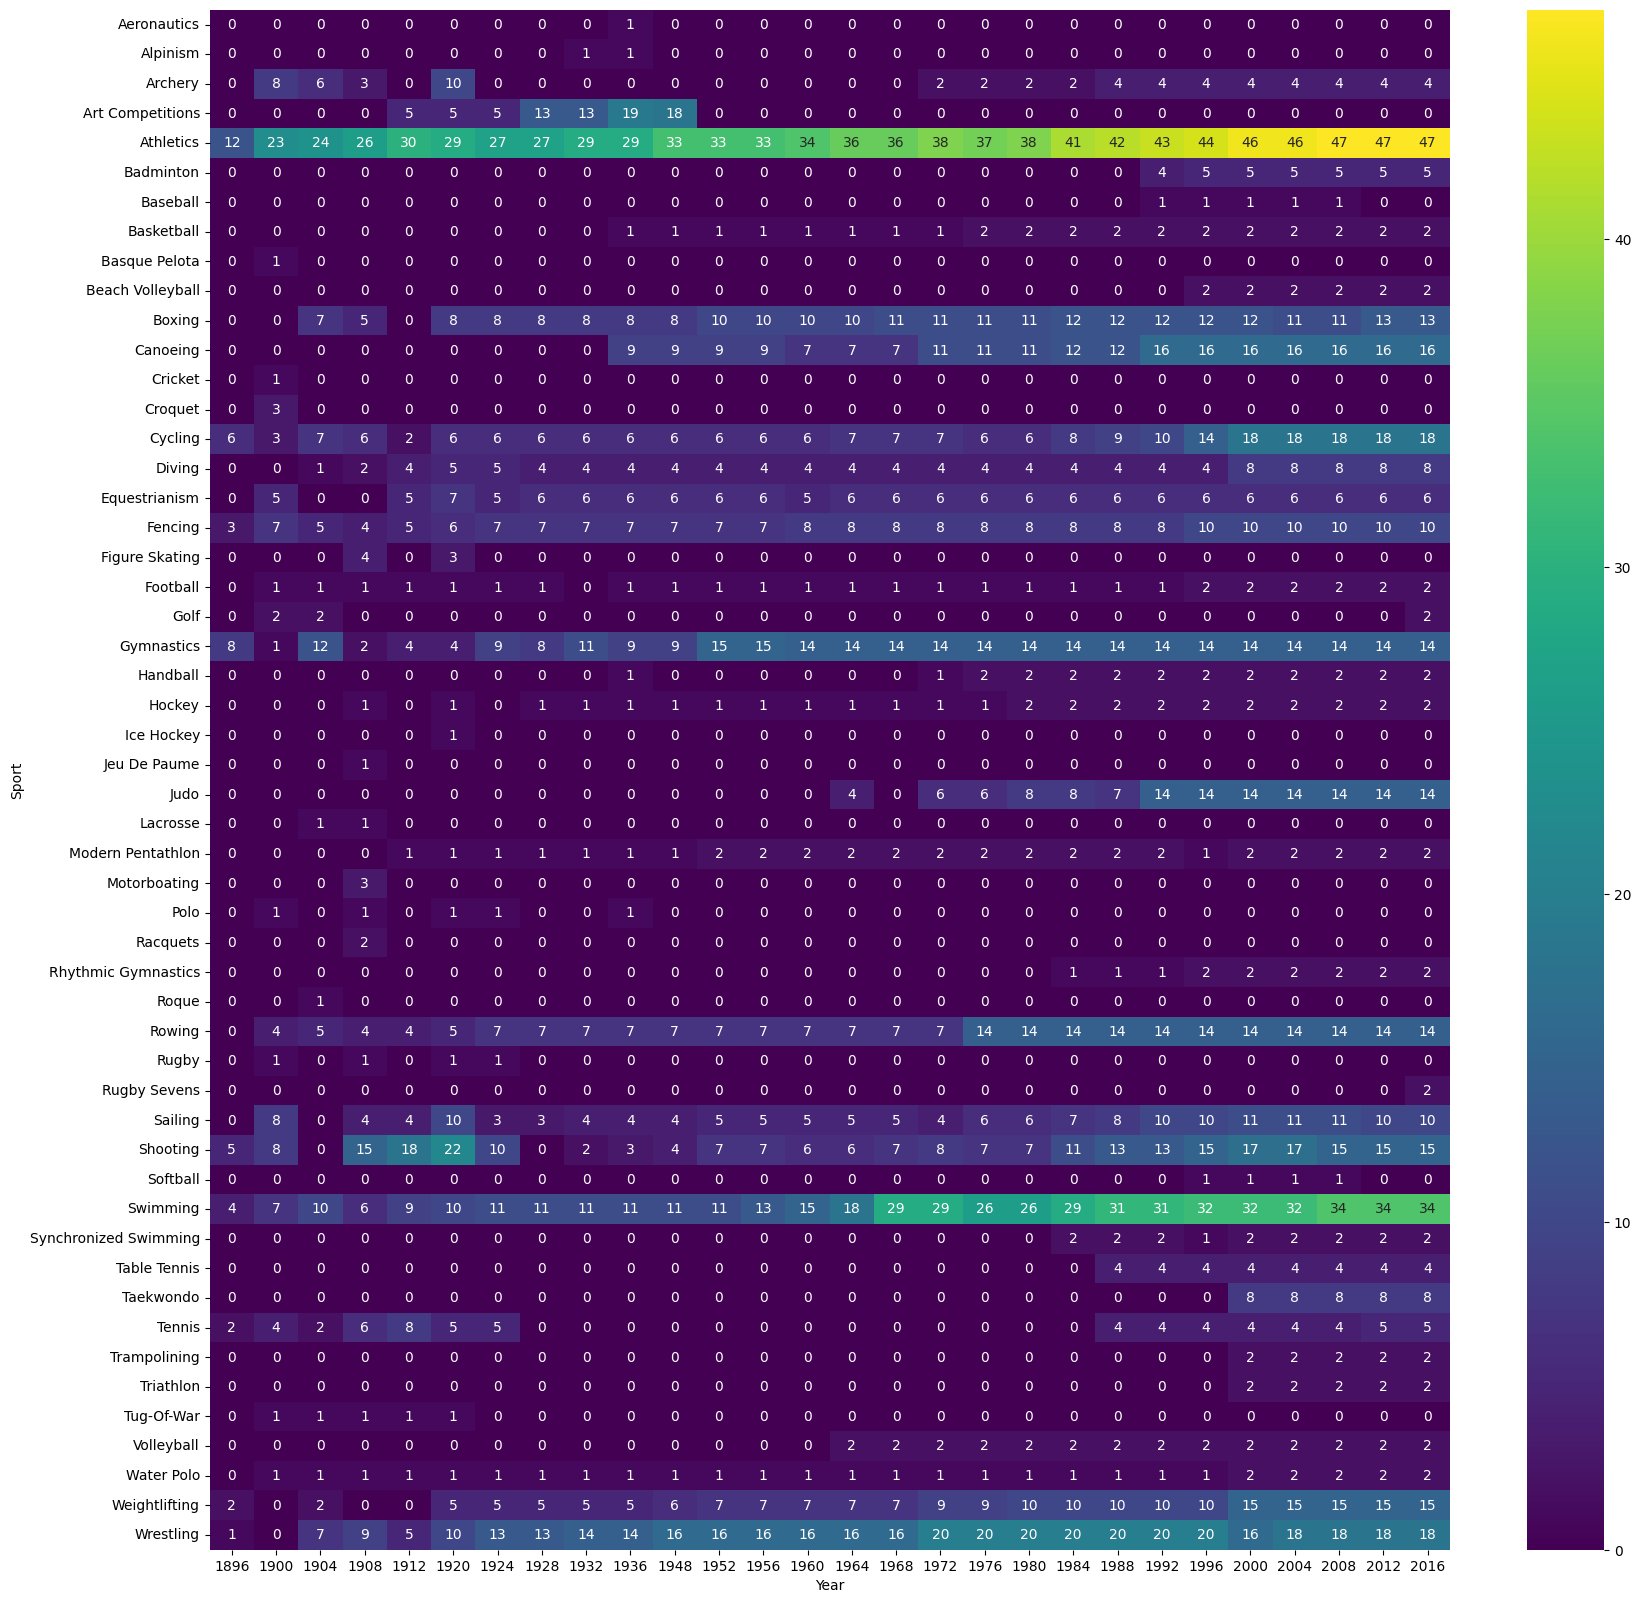

In [83]:
import seaborn as sns 
import matplotlib.pyplot as plt
x = df.drop_duplicates(['Year','Event', 'Sport'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'), annot= True,cmap = 'viridis')

In [84]:
def most_successful(sport,df) :
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    temp_df = temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on ='Name', right_on = 'Name', how ='left')
    #extracting important columsn 
    temp_df = temp_df[['Name','count','region','Sport']]    #drop duplicates 
    temp_df = temp_df.drop_duplicates('Name').reset_index()
    temp_df = temp_df.drop('index', axis = 1)
    temp_df.rename(columns = {'count' : 'Medals','region' : 'Country'}, inplace = True)
    return temp_df

LEARN ABOUT PANDAS MERGE 

In [85]:
most_successful('Overall',df)

,Name,Medals,Country,Sport
0,"Michael Fred Phelps, II",28,USA,Swimming
1,Larysa Semenivna Latynina (Diriy-),18,Russia,Gymnastics
2,Nikolay Yefimovich Andrianov,15,Russia,Gymnastics
3,Takashi Ono,13,Japan,Gymnastics
4,Borys Anfiyanovych Shakhlin,13,Russia,Gymnastics
5,Edoardo Mangiarotti,13,Italy,Fencing
6,Birgit Fischer-Schmidt,12,Germany,Canoeing
7,Paavo Johannes Nurmi,12,Finland,Athletics
8,Aleksey Yuryevich Nemov,12,Russia,Gymnastics
9,Sawao Kato,12,Japan,Gymnastics


PART 3 - COUNTRY WISE ANALYSIS  
country wise medal tally per year ( line plot)  
What countries are good at heatmap   
Most successful athelets ( Top 10) per country 


In [86]:
temp_df = df.dropna(subset=['Medal'])

In [87]:
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'])

In [88]:
temp_df = temp_df[temp_df['region'] == 'USA']

In [89]:
temp_df = temp_df.groupby('Year').count()['Medal'].reset_index()
# temp_df

In [90]:
temp_df.rename(columns={'Medal' : 'Total Medals'},inplace=True)

In [91]:
fig = px.line(temp_df, x="Year", y="Total Medals")
fig.show()

In [92]:
def countrys_sport_analysis(df,country) : 
   temp_df = df.dropna(subset=['Medal'])
   temp_df = temp_df[temp_df['region'] == country]
   temp_df.drop_duplicates(subset=['Medal','Games','Sport','Event','region'],inplace=True)

   return sns.heatmap(temp_df.pivot_table(index='Sport', columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'), annot=True, cmap='viridis')
   


<Axes: xlabel='Year', ylabel='Sport'>

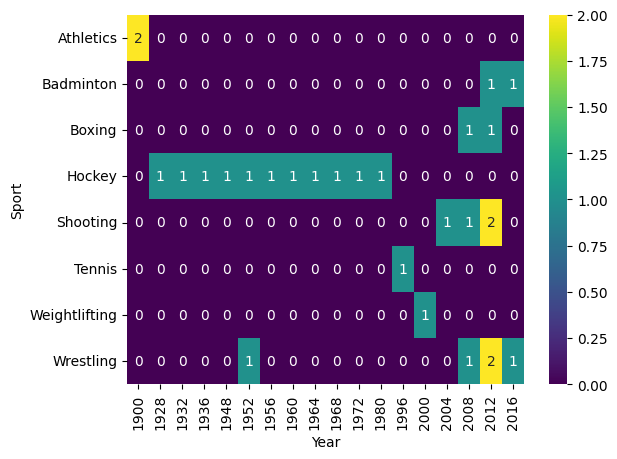

In [93]:
countrys_sport_analysis(df,'India')

In [94]:
def most_successful_in_country(country,df) :
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]
    
    temp_df = temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on ='Name', right_on = 'Name', how ='left')
    #extracting important columsn 
    temp_df = temp_df[['Name','count','Sport']]    #drop duplicates 
    temp_df = temp_df.drop_duplicates('Name').reset_index()
    temp_df = temp_df.drop('index', axis = 1)
    temp_df.rename(columns = {'count' : 'Medals'}, inplace = True)
    return temp_df

In [95]:
most_successful_in_country('India',df)

,Name,Medals,Sport
0,Leslie Walter Claudius,4,Hockey
1,Udham Singh Kular,4,Hockey
2,"Victor John ""V. J."" Peter",3,Hockey
3,Dhyan Chand Bais,3,Hockey
4,Richard James Allen,3,Hockey
5,Shankar Pillay Laxman,3,Hockey
6,Balbir Singh,3,Hockey
7,Harbinder Singh Chimni,3,Hockey
8,Prithipal Singh,3,Hockey
9,Ranganathan Francis,3,Hockey


In [101]:
import plotly.figure_factory as ff 
# from plotly.tools import figure_factory as ff
# import scipy

In [102]:
athelete_df = df.drop_duplicates(subset=['Name','region'])


In [103]:
x1 = athelete_df['Age'].dropna()
x2 = athelete_df[athelete_df['Medal'] == 'Gold'] ['Age'].dropna()
x3 = athelete_df[athelete_df['Medal'] == 'Silver'] ['Age'].dropna()
x4 = athelete_df[athelete_df['Medal'] == 'Bronze'] ['Age'].dropna()

In [104]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age', 'Gold Medalist', 'Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()